In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Load the dataset

In [63]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [64]:
X_train.shape

(50000, 32, 32, 3)

In [65]:
y_train.shape

(50000, 1)

In [66]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [67]:
y_train = y_train.reshape(-1,)
print('shape:',y_train.shape)
y_train[0:5]

shape: (50000,)


array([6, 9, 9, 4, 1], dtype=uint8)

In [68]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [69]:
Classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [70]:
#Ploting images:

In [71]:
def plot_image(X, y, index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(Classes[y_train[index]].upper())

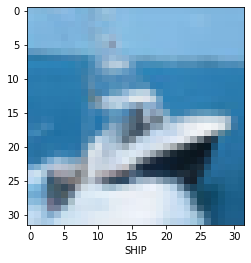

In [72]:
plot_image(X_train, y_train, 8)

# Normalizing the data

In [73]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [74]:
X_train = X_train/255.0
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [75]:
X_test = X_test/255.0
X_test[0].shape

(32, 32, 3)

# Building our convolutional neural network model

In [96]:
cnn = models.Sequential([
    layers.Conv2D( input_shape=(32, 32, 3), filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4697 - accuracy: 0.4702 - val_loss: 1.2140 - val_accuracy: 0.5725
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1284 - accuracy: 0.6045 - val_loss: 1.0835 - val_accuracy: 0.6142
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0019 - accuracy: 0.6513 - val_loss: 0.9853 - val_accuracy: 0.6572
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9132 - accuracy: 0.6828 - val_loss: 0.9426 - val_accuracy: 0.6737
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8449 - accuracy: 0.7087 - val_loss: 0.9301 - val_accuracy: 0.6853
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7904 - accuracy: 0.7252 - val_loss: 0.9386 - val_accuracy: 0.6828
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7418 - accuracy: 0.7416 - val_loss: 0.9009 -

here we would have achieved more accuracy by running more epochs

# accuracy

In [97]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9188 - accuracy: 0.7006


[0.9188446998596191, 0.7006000280380249]

# Predictions


In [98]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.2001748e-04, 5.0893921e-04, 1.1353767e-02, 7.1441251e-01,
        3.0098963e-05, 5.7003658e-02, 2.0844968e-01, 2.1838607e-05,
        7.6232743e-03, 2.7636313e-04],
       [6.4098923e-03, 3.2798576e-03, 8.3870782e-06, 6.4584339e-07,
        4.5639320e-07, 2.5380677e-07, 1.5854870e-07, 3.4690741e-09,
        9.9023998e-01, 6.0375391e-05],
       [2.0034583e-01, 3.7919813e-01, 2.0356715e-02, 1.4094573e-01,
        1.4699150e-02, 5.9126089e-03, 6.7450874e-03, 6.5514655e-04,
        1.9235188e-01, 3.8789652e-02],
       [9.2813826e-01, 8.6345002e-03, 1.1938392e-02, 8.5226772e-04,
        2.2263322e-02, 1.1851928e-04, 4.5662085e-04, 5.4959539e-05,
        2.6049886e-02, 1.4932991e-03],
       [6.6262635e-07, 5.9371819e-06, 2.2556890e-02, 2.0960243e-02,
        7.9069853e-02, 1.2981312e-03, 8.7607700e-01, 9.2354162e-07,
        2.6010788e-05, 4.3748528e-06]], dtype=float32)

In [99]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [100]:
[Classes[indx] for indx in y_classes[:5]]

['cat', 'ship', 'automobile', 'airplane', 'frog']

In [101]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [102]:
[Classes[indx] for indx in y_test[:5]]

['cat', 'ship', 'ship', 'airplane', 'frog']